# Exercise 04 - Ricardo Andrés Marín Guerra


# Part 1 - Linear Regression

Estimate a regression using the Income data


## Forecast of income

We'll be working with a dataset from US Census indome ([data dictionary](https://archive.ics.uci.edu/ml/datasets/Adult)).

Many businesses would like to personalize their offer based on customer’s income. High-income customers could be, for instance, exposed to premium products. As a customer’s income is not always explicitly known, predictive model could estimate income of a person based on other information.

Our goal is to create a predictive model that will be able to output an estimation of a person income.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
income = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/income.csv.zip', index_col=0)

income.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,51806.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,68719.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,51255.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,47398.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,30493.0


In [2]:
income.shape

(32561, 15)

# Exercise 4.1 

What is the relation between the age and Income?

For a one percent increase in the Age how much the income increases?

Using sklearn estimate a linear regression and predict the income when the Age is 30 and 40 years

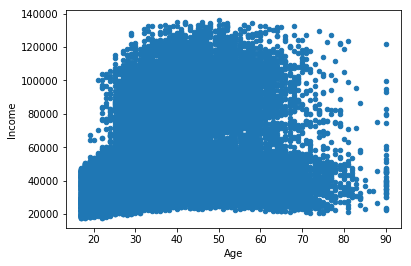

In [3]:
income.plot(x='Age', y='Income', kind='scatter')

La relación entre edad e ingresos no es tan clara, parece ser que es directamente proporcional 

Normalizar los datos

Text(0,0.5,'Income')

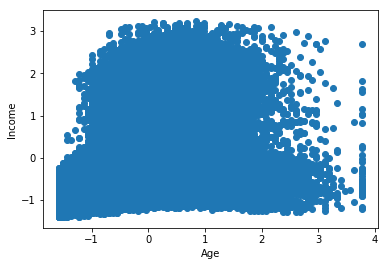

In [56]:
###Normalizar los datos
y = income['Income'].values
X = income['Age'].values

y_mean, y_std = y.mean(), y.std()
X_mean, X_std = X.mean(), X.std()

y = (y - y_mean)/ y_std
X = (X - X_mean)/ X_std

plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Income')

In [57]:
n_samples=len(X)
X_ = np.c_[np.ones(n_samples), X]
# Initialize
linreg = LinearRegression(fit_intercept=False)

# Fit
linreg.fit(X_, y)

print(linreg.coef_)

# create X and y
n_samples = X.shape[0]
X_ = np.c_[np.ones(n_samples), X]


[1.00903263e-16 2.90408298e-01]


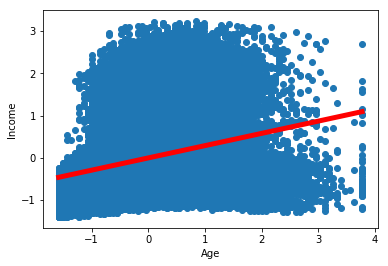

In [6]:
beta_ini = np.array([6.42181590e-17, 2.90408298e-01])

# h
def lr_h(beta,x):
    return np.dot(beta, x.T)

# scatter plot
plt.scatter(X, y)

# Plot the linear regression
x = np.c_[np.ones(2), [X.min(), X.max()]]
plt.plot(x[:, 1], lr_h(beta_ini, x), 'r', lw=5)
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Como se observa en la gráfica de la regresión la relación entre las variables es directamente proporcional, es decir que a medida que incrementa la edad también existe una tendencia de incremento en el ingreso, al interpretar el parametro beta asociado a la edad la conclusión es que por un incremento de un año en la edad de la persona el ingreso se incrementa en 0.2904 veces

## Predicción del Ingreso con 30 y 40 años  

Entrenar el modelo de regresión lineal de la librería sklearn

In [7]:
# import
from sklearn.linear_model import LinearRegression

# Initialize
linreg = LinearRegression(fit_intercept=True)

# Fit
linreg.fit(income[['Age']], income['Income'])

print(linreg.coef_)
print(linreg.intercept_)


[542.16765707]
32538.088130868535


Predicción para Edad 30

In [8]:
Income30 = linreg.predict(30)
Income30
print('Para 30 años la predicción de ingreso es',Income30)

Para 30 años la predicción de ingreso es [48803.11784304]


Predicción para Edad 40

In [9]:
Income40 = linreg.predict(40)
Income40
print('Para 30 años la predicción de ingreso es',Income40)

Para 30 años la predicción de ingreso es [54224.79441376]


# Exercise 4.2
Evaluate the model using the MSE

In [10]:
y_pred = linreg.predict(income[['Age']])
print(y_pred)

[53682.62675669 59646.47098449 53140.45909962 ... 63983.81224107
 44465.77658646 60730.80629863]


In [11]:
from sklearn import metrics
MSE_age=metrics.mean_squared_error(income['Income'], y_pred)
print('MSE:', MSE_age)

MSE: 593783043.8402297



# Exercise 4.3

Run a regression model using as features the Age and Age$^2$ using the OLS equations

In [12]:
##Calcular edad al cuadrado
income['Age2']=income['Age']**2
##Meter los valores en el vector de X
X = income[['Age', 'Age2']].values

from sklearn.preprocessing import StandardScaler
#Preprocesamiento escalar
ss = StandardScaler(with_mean=True, with_std=True)
#.fit con los datos de edad y edad^2
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))
print(ss.mean_, ss.scale_)


[  38.58164676 1674.59915236] [  13.64022309 1179.02941609]


In [16]:
#Pegarle los unos a la izquierda
n_samples=len(X)
X_ = np.c_[np.ones(n_samples), X]
#Calculo de los betas a partir de la inversa
betas_ols = np.dot(np.linalg.inv(np.dot(X_.T, X_)),np.dot(X_.T, y))
betas_ols

array([-8.66867806e-18,  1.67751068e+00, -1.41415206e+00])

La ecuación sería

### $$ h_\beta(x) = \beta_0 + \beta_1 x_1 + \beta_2 x_2$$
con $x_2$ = $area^2$ y $x_1$ = $area$

# Exercise 4.4


Estimate a regression using more features.

How is the performance compared to using only the Age?

In [17]:
linreg.fit(income[['Age', 'Age2']], income['Income'])
y_pred_age_2 = linreg.predict(income[['Age', 'Age2']])
MSE_age_2=metrics.mean_squared_error(income['Income'], y_pred_age_2)
print('MSE sólo con edad:', MSE_age)
print('MSE con edad al cuadrado:',MSE_age_2)
print('Diferencia:',MSE_age-MSE_age_2)

MSE sólo con edad: 593783043.8402297
MSE con edad al cuadrado: 544646260.7818171
Diferencia: 49136783.05841267


Utilizando el MSE como métrica de evaluación del modelo, este mejora al utilizar la edad al cuadrado

# Part 2: Logistic Regression

### Customer Churn: 
losing/attrition of the customers from the company. Especially, the industries that the user acquisition is costly, it is crucially important for one company to reduce and ideally make the customer churn to 0 to sustain their recurring revenue. If you consider customer retention is always cheaper than customer acquisition and generally depends on the data of the user(usage of the service or product), it poses a great/exciting/hard problem for machine learning.

### Data
Dataset is from a telecom service provider where they have the service usage(international plan, voicemail plan, usage in daytime, usage in evenings and nights and so on) and basic demographic information(state and area code) of the user. For labels, I have a single data point whether the customer is churned out or not.


In [18]:
# Download the dataset
data = pd.read_csv('https://github.com/ghuiber/churn/raw/master/data/churn.csv')

In [19]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


Conocer cuales son las columnas disponibles

In [20]:
data.columns.values

array(['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan",
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls',
       'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge', 'CustServ Calls', 'Churn?'], dtype=object)

# Exercise 4.5

Create Y and X

What is the distribution of the churners?

Split the data in train (70%) and test (30%)


Para conocer la distribución de los churners es bueno saber cuantos cuantos existe en la base y conocerlos mejor

In [21]:
data['Churn?'].value_counts()

False.    2850
True.      483
Name: Churn?, dtype: int64

In [22]:
data['Churn?'].describe()

count       3333
unique         2
top       False.
freq        2850
Name: Churn?, dtype: object

In [23]:
pd.pivot_table(data, index='Churn?', aggfunc=np.mean)

,Account Length,Area Code,CustServ Calls,Day Calls,Day Charge,Day Mins,Eve Calls,Eve Charge,Eve Mins,Intl Calls,Intl Charge,Intl Mins,Night Calls,Night Charge,Night Mins,VMail Message
Churn?,,,,,,,,,,,,,,,,
False.,100.793684,437.074737,1.449825,100.283158,29.780421,175.175754,100.038596,16.918909,199.043298,4.532982,2.743404,10.158877,100.058246,9.006074,200.133193,8.604561
True.,102.664596,437.817805,2.229814,101.335404,35.175921,206.914079,100.561077,18.054969,212.410145,4.163561,2.889545,10.700000,100.399586,9.235528,205.231677,5.115942


Particionar los datos en train y test, en este caso 70% de train y 30% de test

In [24]:
data['Churn']=data['Churn?'].replace('False.',0)
data['Churn']=data['Churn'].replace('True.',1)
data

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False.,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False.,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False.,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False.,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False.,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,False.,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,29.62,212.6,118,9.57,7.5,7,2.03,3,False.,0
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,8.76,211.8,96,9.53,7.1,6,1.92,0,False.,0
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,29.89,215.8,90,9.71,8.7,4,2.35,1,False.,0
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,18.87,326.4,97,14.69,11.2,5,3.02,0,False.,0


In [28]:
# create training and testing vars
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)
print("La base de entrenamiento tiene:",len(train))
print("La base de test tiene:",len(test))
print("La base de total tiene:",len(data))


La base de entrenamiento tiene: 2333
La base de test tiene: 1000
La base de total tiene: 3333


# Exercise 4.6

Train a Logistic Regression using the training set and apply the algorithm to the testing set.

Para una única variable se tiene el modelo que se muestra a continuación:

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()#solver='liblinear',C=1e9)
feature_cols = ['Day Charge']#['Day Mins','Day Charge','Eve Mins','Eve Charge']
X = train[feature_cols]
#X = train['Day Charge']
y = train['Churn']
logreg.fit(X, y)
train['Churn_pred_class'] = logreg.predict(X)#test[feature_cols])
test['Churn_pred_class']=logreg.predict(test[feature_cols])

C:\Users\ramaringu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ramaringu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Revisemos como se encuentran las predicciones

In [40]:
train['Churn_pred_class'].value_counts()

0    2333
Name: Churn_pred_class, dtype: int64

Todas son falsas revisando en las predicciones de train, ahora se hace una revisión de las predicciones de test

In [41]:
test['Churn_pred_class'].value_counts()

0    1000
Name: Churn_pred_class, dtype: int64

Al igual que con el dataset de entrenamiento en el de prueba todas las predicciones son falsas, esto se puede deber a que la muestra inicial es muy desbalanceada ya que tiene muchos más casos en los que el churn es falso, para esto se hará una corrección en el modelo, también podría cambiarse el muestreo

A través de la sentencia class_weight = 'balanced' se busca balancear la base para obtener predicciones de ambos tipos

In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight = 'balanced')#solver='liblinear',C=1e9)
feature_cols = ['Day Charge']#['Day Mins','Day Charge','Eve Mins','Eve Charge']
X = train[feature_cols]
#X = train['Day Charge']
y = train['Churn']
logreg.fit(X, y)
train['Churn_pred_class'] = logreg.predict(X)#test[feature_cols])
test['Churn_pred_class']=logreg.predict(test[feature_cols])

C:\Users\ramaringu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ramaringu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
test['Churn_pred_class'].value_counts()

0    563
1    437
Name: Churn_pred_class, dtype: int64

Para una mayor cantidad de variables se tiene lo siguiente

In [49]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear',C=1e9)#class_weight = 'balanced')#solver='liblinear',C=1e9)
feature_cols = ['Day Charge','Day Mins','Day Charge','Eve Mins','Eve Charge','Night Mins',
       'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
       'Intl Charge']

X = train[feature_cols]
#X = train['Day Charge']
y = train['Churn']
logreg.fit(X, y)
train['Churn_pred_class'] = logreg.predict(X)#test[feature_cols])
test['Churn_pred_class']=logreg.predict(test[feature_cols])

C:\Users\ramaringu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\ramaringu\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [50]:
test['Churn_pred_class'].value_counts()

0    996
1      4
Name: Churn_pred_class, dtype: int64

# Exercise 4.7

a) Create a confusion matrix using the prediction on the 30% set.

b) Estimate the accuracy of the model in the 30% set


A continuación se calculará la matriz de confusión y el accuracy del último modelo utilizado es decir el modelo con múltiples variables

In [51]:
###Matriz de confusión 
from sklearn.metrics import confusion_matrix
#y_true = [2, 0, 2, 2, 0, 1]
#y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(test['Churn'], test['Churn_pred_class'])

array([[870,   1],
       [126,   3]], dtype=int64)

El accuracy es 

In [52]:
from sklearn.metrics import accuracy_score
accuracy_score(test['Churn'], test['Churn_pred_class'])

0.873

In [54]:
from sklearn.metrics import classification_report
print(classification_report(test['Churn'],test['Churn_pred_class']))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93       871
          1       0.75      0.02      0.05       129

avg / total       0.86      0.87      0.82      1000

